### <b><i>Fruits and Vegetables Prices Dataset</b></i>
##### Набір даних про ціни на фрукти та овочі – роздрібні та фермерські ціни на різні продукти в різних містах (1999–2019) <br><a href="https://www.kaggle.com/datasets/everydaycodings/produce-prices-dataset">Fruits and Vegetables Prices Dataset</a>
#### <b><i>Огляд</b></i>
##### Цей набір даних детально розглядає роздрібні та фермерські ціни на різні свіжі продукти в різних містах. <br>Дані охоплюють період з 1999 по 2019 рік і включають інформацію про назви продуктів, дати, <br>ціни на ферми та роздрібні ціни у великих містах, таких як Атланта, Чикаго, Лос-Анджелес і Нью-Йорк.

In [182]:
# Імпортуємо такі бібліотеки:
# - pandas (під псевдонімом pd): Використовується для обробки і аналізу даних, зазвичай в табличній формі.
# - numpy (під псевдонімом np): Використовується для роботи з числовими масивами та матрицями у Python.
# - seaborn (під псевдонімом sns): Це бібліотека для статистичної візуалізації даних, яка працює поверх бібліотеки Matplotlib.
# - matplotlib.pyplot (під псевдонімом plt): Бібліотека для створення графіків та візуалізації даних у Python.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
# Створення класу ProductAnalyze:
# Визначений клас, який включає функціонал для аналізу продуктів.
class ProductAnalyze:
    def __init__(self, path):
        # У цьому рядку коду відбувається виклик методу read_data(path) класу ProductAnalyze, який завантажує наші дані в self.df
        self.df = self.read_data(path) 
    
    def read_data(self, path):
        # Цей рядок завантажує дані з CSV-файлу за вказаним шляхом і встановлює колонку "productname" як індекс (індексуючи дані за назвою продукту).
        df_buffer = pd.read_csv(path, index_col='productname')
        # Ця операція використовує метод map для виконання функції lambda, яка видаляє символи '%' і '$' з кожного значення в DataFrame df_buffer. 
        df_buffer = df_buffer.map(lambda x: x.strip("%$"))
        # Повертає змінну df_buffer, яка містить змінені дані з CSV-файлу.
        return df_buffer

    def rework_data(self):
        # Перевіряє, чи існує стовпець з назвою 'averagespread' у DataFrame self.df.
        if 'averagespread' in self.df.columns:
            # Якщо стовпець 'averagespread' існує, цей рядок замінює коми у числових значеннях стовпця 'averagespread' на порожній рядок. 
            # Це припускає, що значення у стовпці 'averagespread' можуть містити коми як роздільники тисяч, які потрібно видалити, щоб правильно інтерпретувати числові дані.
            self.df['averagespread'] = self.df['averagespread'].replace(',', '', regex=True)

        # Замінює всі порожні рядки у DataFrame на значення NaN (Not a Number).
        self.df.replace('', np.nan, inplace=True)
        # Видаляє рядки, де всі значення (у всіх стовпцях) є NaN.
        self.df.dropna(subset=self.df.columns, how='all', inplace=True)

        # Визначає список стовпців, починаючи з другого стовпця, для подальшого перетворення на числовий тип.
        cols_to_convert = self.df.columns[1:7]
        # Конвертує значення у відповідних стовпцях DataFrame self.df в числовий тип даних (float). 
        # Це припускає, що всі значення у цих стовпцях мають бути числовими, а метод astype(float) спробує конвертувати їх у відповідний числовий формат.
        self.df[cols_to_convert] = self.df[cols_to_convert].astype(float)
        self.df.loc[:, 'productname'] = self.df.index

    def clean_data(self):
        # Перевіряє, чи є пропущені значення у DataFrame self.df.
        self.df = self.df.replace([np.inf, -np.inf], np.nan)
        if self.df.isnull().values.any():
            # Пробує замінити всі пропущені значення у DataFrame на 0.0. 
            # Однак без параметру inplace=True ця зміна не буде відображена у вихідних даних; можливо, варто додати inplace=True, щоб зберегти ці зміни в DataFrame self.df.
            self.df.fillna(0.0)

    def output_data(self, num_rows):
        # Вибирає перші num_rows рядків з DataFrame self.df та вибирає перші num_rows рядків з DataFrame self.df.
        # В даному випадку відбувається одразу виведення вмісту (перших num_rows рядків) за допомогою функції print(). 
        # Функція print() виводить результат методу self.df.head(num_rows) у консоль або інше місце виведення.
        return print(self.df.head(num_rows))

    def handler_plot(self, xlabel, ylabel, title, rot = 0):
        # Встановлюють підписи для вісей x та y графіка відповідно, де xlabel і ylabel є аргументами, які передаються у функцію.
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        # Встановлює обертання міток на вісі x на заданий кут rot (за замовчуванням rot = 0, що означає горизонтальне положення міток).
        plt.xticks(rotation=rot)
        # Встановлює заголовок графіка, де title є аргументом, що передається у функцію.
        plt.title(title)
        # Відображає побудований графік у поточному вікні виведення.
        plt.show()

    def build_heatmap(self, data):
        # Вибирає підмножину даних з DataFrame data. Зразок обмежений першими 10 рядками та стовпцями з 2 по 5 включно (індексація в Python починається з 0).
        subset = data.iloc[:10, 2:6]
        # Конвертує підмножину даних subset у масив NumPy.
        subset_np = subset.to_numpy()
        # Створює теплову карту (heatmap) за допомогою бібліотеки Seaborn. Використовує subset_np як дані для побудови. 
        # Використовується колірна карта 'RdYlGn' (червона, жовта, зелена). 
        # vmin та vmax встановлюють мінімальне та максимальне значення кольорової шкали відповідно.
        # annot=True додає значення на теплову карту.
        sns.heatmap(data=subset_np, cmap='RdYlGn', vmin=subset_np.min(), vmax=subset_np.max(), annot=True)
        # Викликає метод handler_plot (який, ймовірно, встановлює підписи та показує графік) 
        # з визначеними параметрами: 'Cities' для підпису осі x, 'Products, $' для підпису осі y і 'Retail Prices in Different Cities' для заголовка графіка. 
        self.handler_plot('Cities', 'Products, $', 'Retail Prices in Different Cities')

    def build_lineplot(self):
        # Вибирає перші 70 рядків з DataFrame self.df.
        data = self.df.head(70)
        # Створює лінійний графік за допомогою бібліотеки Seaborn. Використовує data як дані для побудови графіку, де змінна 'date' відповідає за ось x, а 'averagespread' - за ось y.
        sns.lineplot(data=data, x='date', y='averagespread')
        self.handler_plot('Date', 'Average Spread, %', 'Average Spread between Farm and Retail Prices by Date')

    def build_barplot(self):
        # Вибирає перші 8 рядків з DataFrame self.df та показує залежність між назвами продуктів ('productname') на вісі x та цінами на фермі ('farmprice') на вісі y.
        data = self.df.head(8)
        sns.barplot(data=data, x='productname', y='farmprice')
        self.handler_plot('Product Name', 'Farm Price, $', 'All products Farm Price by Product Name', rot=90)

    def build_histplot(self):
        # Створює гістограму за допомогою методу sns.histplot. Вибирає перші 70 рядків з DataFrame self.df та відображає розподіл середнього розбіження ('averagespread').
        data = self.df.head(70)
        sns.histplot(data=data, x='averagespread')
        self.handler_plot('Average Spread', None, 'Average Spread, %')

    def build_pairplot(self):
        # Викликає sns.pairplot для побудови матриці діаграм розсіювання для DataFrame self.df, при цьому видаляються дублікати за колонкою 'date'. 
        # Показує кореляції між різними параметрами.
        data = self.df.drop_duplicates(subset='date', keep='first')
        data = data.iloc[:, :7]
        data = data.reset_index()
        sns.pairplot(data=data)
        plt.show()

    def build_replot(self):
        # Використовує sns.relplot для побудови графіку розсіювання. 
        # Оновлює певні колонки DataFrame за допомогою self.get_corr_pearson() та обмежує дані до унікальних значень за колонкою 'date'. 
        # Графік показує залежність між цінами в Атланті ('atlantaretail') та Чикаго ('chicagoretail') за різні дати.
        self.df.iloc[:, 2:6].update(self.get_corr_pearson())
        data = self.df.drop_duplicates(subset=['date'])
        data = data.head(30)
        sns.relplot(data=data, x="date", y="atlantaretail", hue="chicagoretail", kind="scatter") 
        self.handler_plot('Date', 'Retail Prices by Chicago', 'Pearson Method for Retail Prices Chicago', rot=90)

    def build_faceitgrid(self, data, date_from, date_to, features):
        # Створює сітку графіків за допомогою sns.FacetGrid. Побудовує графіки розсіювання для цін в Атланті в залежності від дати для кожного товару окремо.
        data = self.df.head(30) # Регулювати кількість вхідних даних
        data = data.loc[(data['date'] >= date_from) & (data['date'] <= date_to)]
        grid = sns.FacetGrid(data, col="productname", hue="productname", col_wrap=5)
        grid.map(sns.scatterplot, 'date', "atlantaretail", alpha=.8)
        plt.xticks(rotation=90)
        plt.show()

    def get_mean(self):
        # Обчислює середнє значення для числових даних, вибраних з колонок з індексами з 2 по 5 (включно) за допомогою .iloc[:, 2:6]. 
        # Це знаходить середнє значення для кожної колонки у цьому діапазоні, а потім обчислює середнє середніх цих значень, використовуючи метод .mean().mean(). 
        # Результат виводиться у форматі рядка із середнім значенням, округленим до двох знаків після коми.
        return f"Mean: {self.df.iloc[:, 2:6].mean().mean():.2f}"

    def get_variance(self):
        # Обчислює дисперсію для числових даних, вибраних з колонок з індексами з 2 по 5 (включно) за допомогою .iloc[:, 2:6]. 
        # Для кожної колонки обчислюється дисперсія, а потім обчислюється середнє значення цих дисперсій за допомогою .var().mean(). 
        # Результат виводиться у форматі рядка із значенням дисперсії, округленим до двох знаків після коми.
        return f"Variance: {self.df.iloc[:, 2:6].var().mean():.2f}"

    def line_plot_annotations(self, date):
        # Створення об'єктів фігури та вісей для побудови графіка.
        fig, ax = plt.subplots()
        # Вибір перших 50 рядків з DataFrame self.df.
        data = self.df.head(50)

        # Цикл for column in ['farmprice', 'atlantaretail', 'chicagoretail', 'losangelesretail']: створює лінійний графік для кожного стовпця, використовуючи дані з колонок.
        for column in ['farmprice','atlantaretail','chicagoretail','losangelesretail']:
            filtered_data = data[data['date'] == date]
            ax.plot(filtered_data['productname'], filtered_data[column], label=column)
        # Додає легенду до графіка.
        ax.legend()

        # Обчислення середніх значень для кожного рядка.
        # Використання цих середніх значень для додавання анотацій (ax.annotate) до відповідних точок на графіку (xy=(x, y)).
        y_values = data[data.columns[2:7]].mean().values
        x_values = data['productname'].unique()

        for x,y in zip(x_values, y_values):  
            ax.annotate(f"{y:.2f}", xy=(x,y), xytext=(5, 5), textcoords='offset points') 
        
        # Автоматичне масштабування графіка.
        ax.autoscale()
        # Поворот підписів осі x на 90 градусів
        plt.xticks(rotation=90)
        plt.show()

    def remove_random_features(self, date_from, date_to):
        max_corr = 0
        rand_feature_a = rand_feature_b = None
        
        # Використовуються вкладені цикли for, щоб знайти пари ознак, які мають найбільшу абсолютну кореляцію між собою (за допомогою методу corr()).
        # Пара ознак, які мають найбільшу кореляцію, зберігаються у змінних rand_feature_a і rand_feature_b.
        for i in range(2, len(self.df.columns)):
            for j in range(i + 1, len(self.df.columns)):
                
                if i == 7 or j == 7:
                    continue

                corr = self.df[self.df.columns[i]].corr(self.df[self.df.columns[j]], method='pearson')
                
                if abs(corr) > max_corr:
                    max_corr = abs(corr)
                    rand_feature_a, rand_feature_b = self.df.columns[i], self.df.columns[j]

        # Створюється копія df_buffer DataFrame self.df.
        df_buffer = self.df.copy()

        # Для кожної з ознак, які мають найбільшу кореляцію, обирається випадковий піднабір рядків (10% від загальної кількості) і встановлюється їхні значення як np.nan.
        for feature in [rand_feature_a, rand_feature_b]:
            is_remove = np.random.choice(df_buffer.index, size=int(0.1 * len(df_buffer)), replace=False)
            df_buffer.loc[is_remove, feature] = np.nan

        # Викликає метод build_faceitgrid, передаючи оновлений DataFrame df_buffer та пару ознак (rand_feature_a і rand_feature_b). Цей метод, ймовірно, відповідає за побудову сітки графіків з використанням вказаних ознак.
        self.build_faceitgrid(df_buffer, date_from, date_to, (rand_feature_a, rand_feature_b))

    def get_corr(self):
        #  Цей метод обчислює кореляційну матрицю за методом за замовчуванням (зазвичай це метод Пірсона) для числових даних, 
        # які вибрані з колонок з індексами від 2 до 5 (включно) за допомогою .iloc[:, 2:6].corr(). Результатом є матриця кореляції між цими колонками.
        return self.df.iloc[:, 2:6].corr()
    
    def get_corr_pearson(self):
        # Цей метод обчислює кореляційну матрицю за методом Пірсона для того самого підмножини даних 
        # за допомогою .iloc[:, 2:6].corr(method='pearson'). Цей метод вказує явно використання методу Пірсона для обчислення кореляції.
        return self.df.iloc[:, 2:6].corr(method='pearson')

#### <b><i>Завдання номер 3</b></i>
##### Відкрити набір даних засобами pandas.<br>```df = pd.read_csv(csv_path)```<br>```df = df.read_excel(xlsx_path)```
##### Це зроблено в самому конструкторі класу, при створенні об'єкту (екземпляру)

In [184]:
# Основні маніпуляції
file = 'csv_data/ProductPriceIndex.csv' # Ініціалізаця змінної, яка містить шлях до файлу датафрейму
product = ProductAnalyze(path=file)  # Створення екземпляру класу (об'єкту), перадача змінної зі шляхом у конструктор

#### <b><i>Завдання номер 2</i></b>
##### Проаналізувати набір даних на наявність пропущених значень та NaN. <br> df.isnull().values.any() <br><br>У випадку наявності таких значень їх потрібно заповнити значеннями за допомогою fillna, <br>використовуючи метод bfill (заміна на наступне валідне значення після Nan) або ffil (заміна на попереднє валідне значення після Nan) <br>```df.bfill()```<br>```df.ffill()```

#### <b><i>Завдання номер 8</i></b>
##### У початковому наборі даних, перед заміною значень Nan на валідні значення за допомогою<br>fillna, необхідно видалити всі колонки із значеннями Nan.<br>```df.dropna()``` 

##### Метод ```clean_data()``` відповідає за виконання завдання №8 та №2. <br>Також, для форматування оригінальних даних і нормалізації їх був створений метод ```rework_data()```

In [192]:
product.clean_data() # Очищення даних
product.rework_data() # Обробка даних

#### <b><i>Завдання номер 4</i></b>
##### Представити його у матричному вигляді. Відобразити 10 елементів для 4-ох ознак Виділити<br> зеленим кольором максимальні елементи в таблиці, а червоним мінімальні для цих 10-ти елементів. <br> Приклад візуалізації:<br><br><img src='images/ExNo4_1.png'>

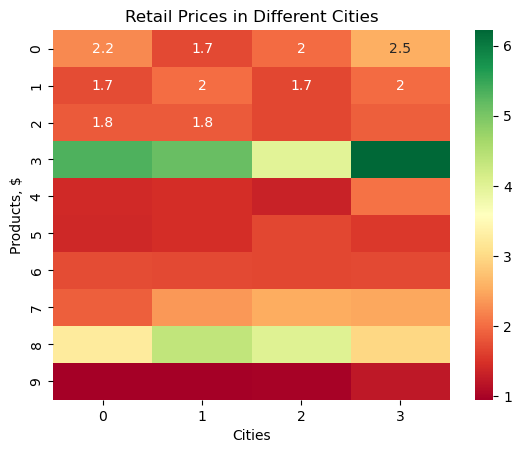

In [186]:
product.build_heatmap(data=product.df) # Побудова теплової карти на основі даних з DataFrame product.df

#### <b><i>Додатково до завдання №4</b></i>
##### Вирахувати математичне сподівання та дисперсію для набору даних. Стандартизувати дані.<br><br><img src='images/ExNo4_2.png'>

In [187]:
print(product.get_mean()) # Отримання середнього значення числових даних
print(product.get_variance()) # Отримання дисперсії числових даних

Mean: 1.79
Variance: 0.99


#### <b><i>Завдання номер 5</i></b>
##### Провести візуалізацію даних. Для цього необхідно побудувати такі типи графіків: Line Plot,<br>Bare Chart, Histogram, Heatmap. <br><br>```import seaborn as sns```<br>```sns.lineplot(data)```<br>```sns.barplot(x, y)```<br>```sns.heatmap(data)```<br>```sns.histplot(data)```

e:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


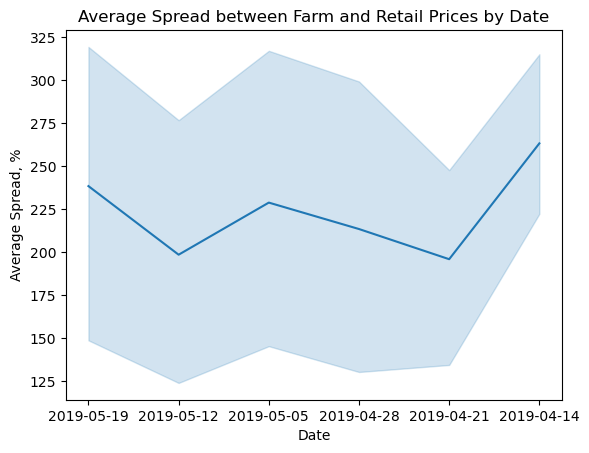

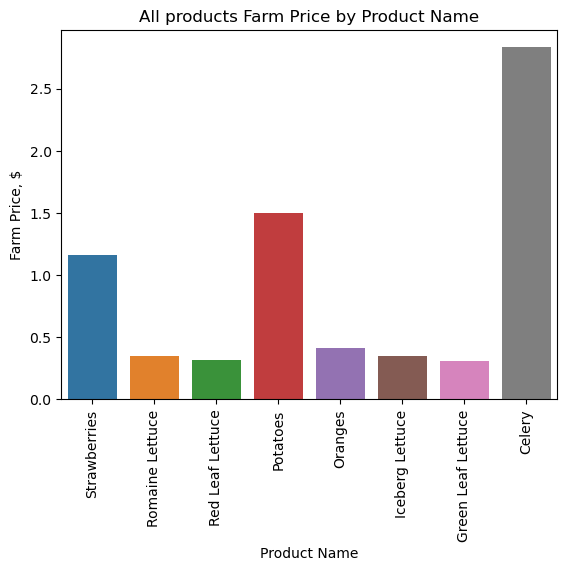

e:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


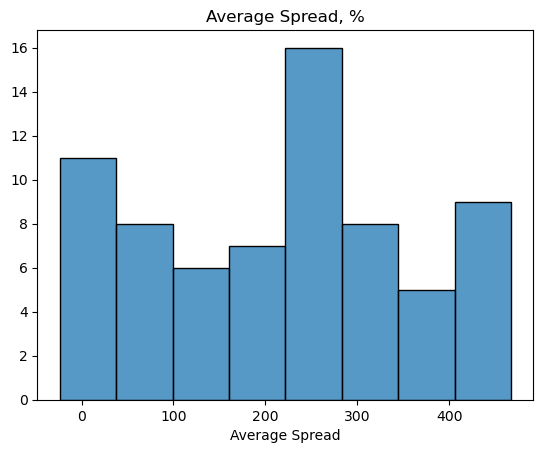

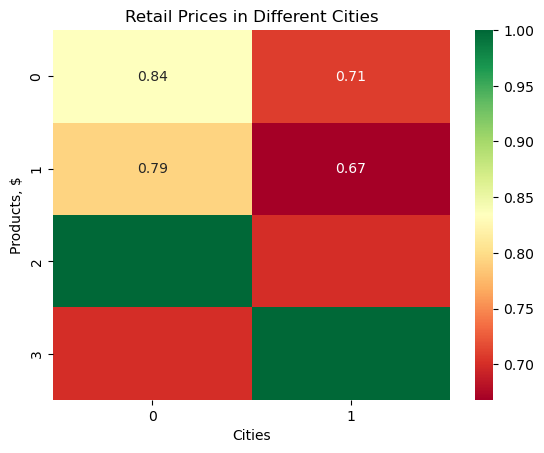

In [188]:
product.build_lineplot() # Побудова лінійного графіку
product.build_barplot() # Побудова стовпчатої діаграми
product.build_histplot() # Побудова гістограми
corr = product.get_corr() # Отримання кореляційної матриці
product.build_heatmap(data=corr) # Побудова теплової карти для отриманої кореляційної матриці

#### <b><i>Завдання номер 6</i></b>
##### Збудувати лінійний графік з 4-ма лініями, які взяті з ознак та додати annotate для середнього<br>значення кожної лінії. При цьому для візуалізації багатовимірних даних з кількістю ознак<br>більше двох обов’язково необхідно за допомогою subplot збудувати 9 графіків за<br>допомогою комбінування різних ознак.<br>Туторіал по subplot та приклади - <a href="https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8">Туторіал по subplot та приклади</a>

##### Виконання завдання описано в методах ```line_plot_annotations(date)```, де аргумент date використовується для фільтрації. <br>Для побудови 9 графіків використовується метод ```build_pairplot()```

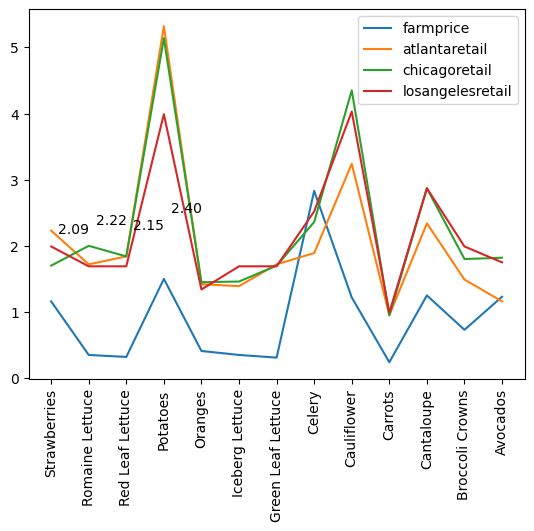

e:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


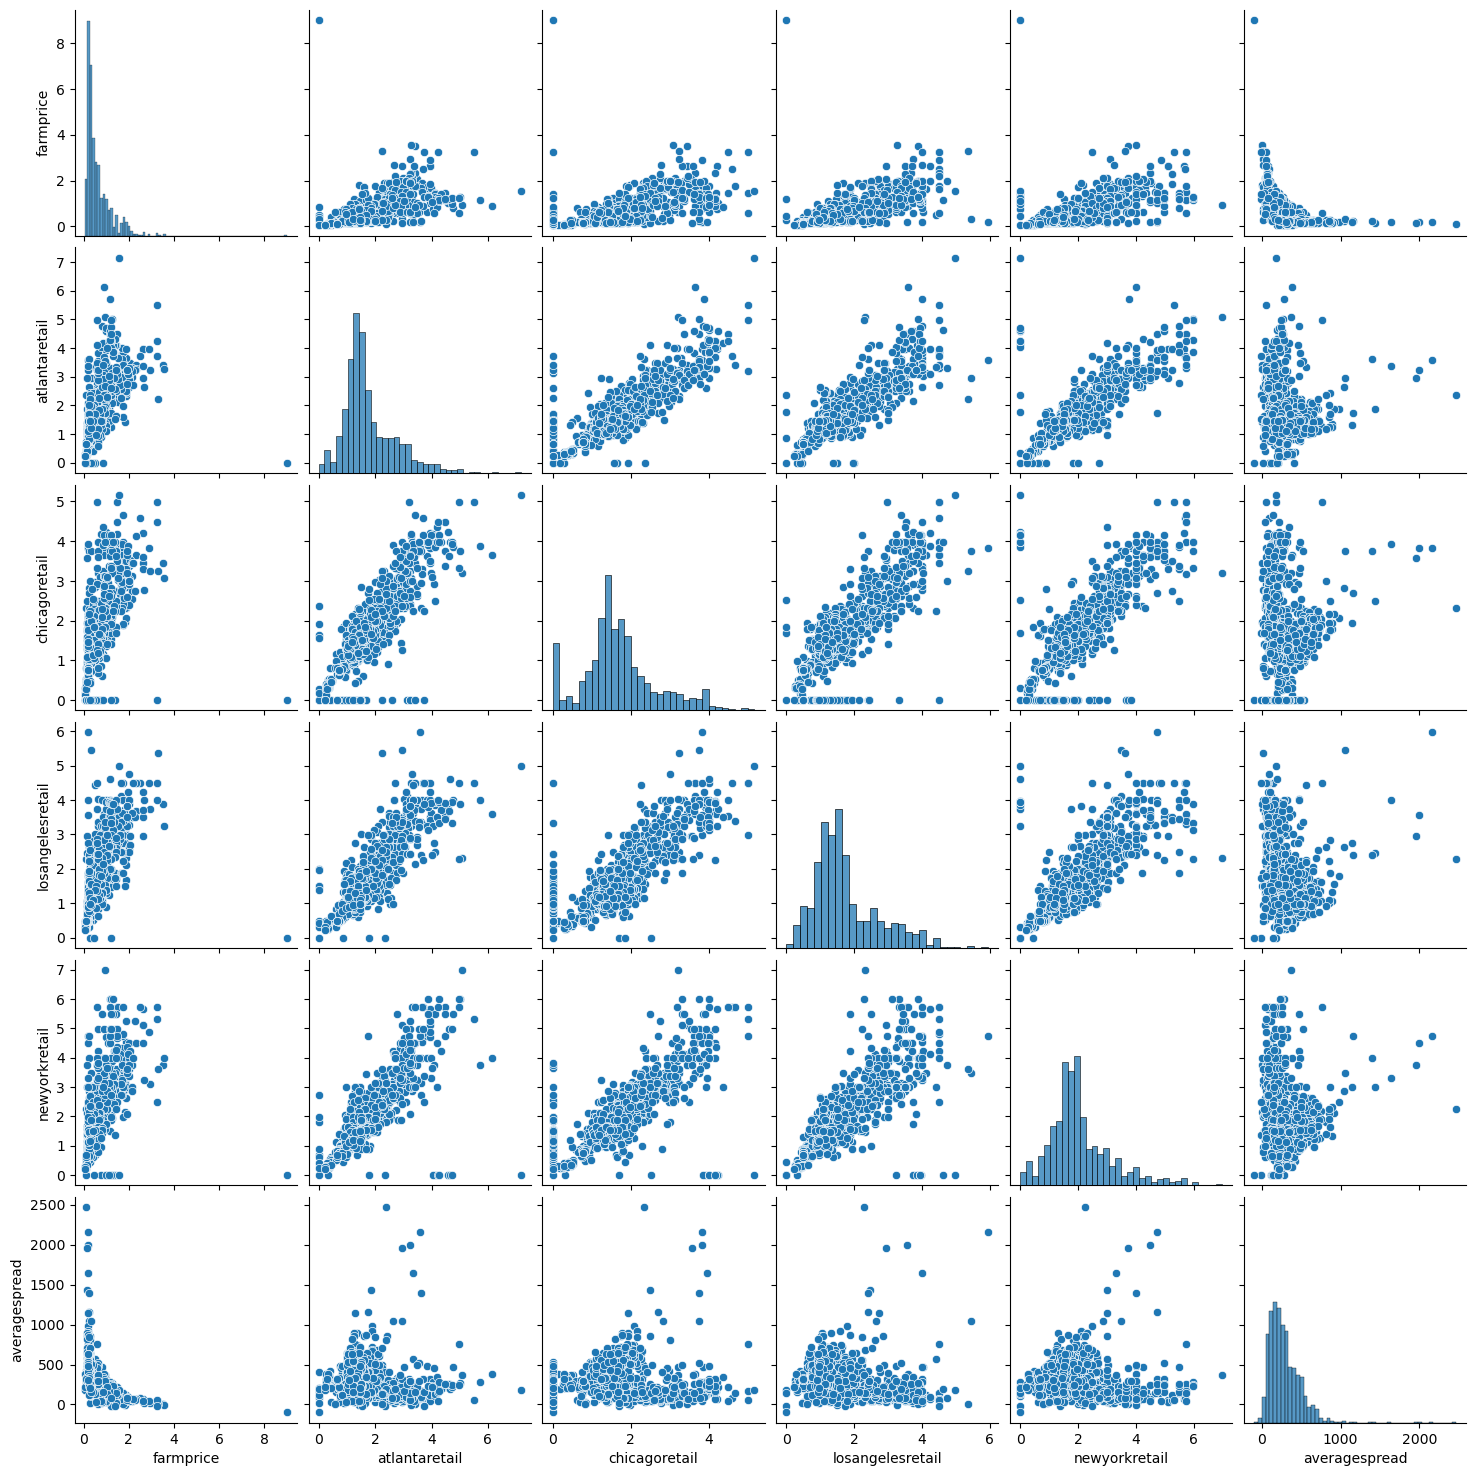

In [189]:
product.line_plot_annotations('2019-05-19') # Побудова лінійного графіку з анотаціями
product.build_pairplot() # Побудова матриці діаграм розсіювання

#### <b><i>Завдання номер 7</i></b>
##### Вирахувати коефіцієнт Пірсона для кожної пари ознак.<br>```df.corr(method="pearson")```<br><br>Взяти третю ознаку за вісь X та збудувати relplot для двох ознак, що мають найбільшу<br>кореляцію за допомогою бібліотеки seaborn.<br>```sns.replot(data)```

##### Виконання завдання описано в ```методі build_replot()```, де використанний метод для вирахування коефіцієнту Пірсона ```get_corr_pearson()```

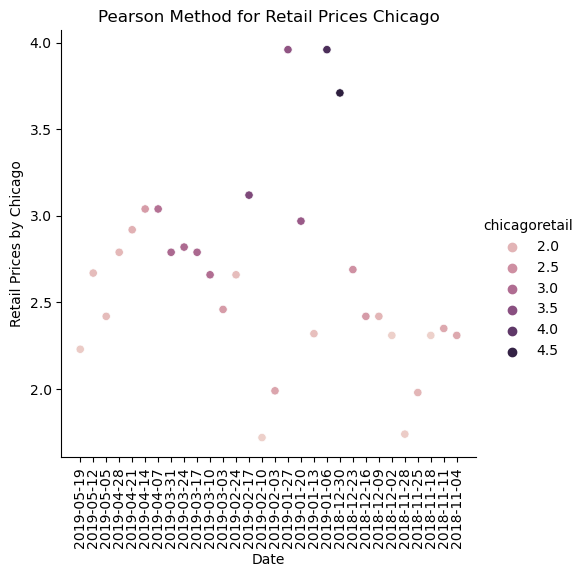

In [190]:
product.build_replot() # Побудова графіку розсіювання з певними параметрами

#### <b><i>Завдання номер 9</i></b>
##### Видалити також випадкові значення з ознак що мають найбільшу кореляцію у кількості 10%<br>для обох. Підрахувати кореляцію. Збудувати multipple scatterplot за допомогою FacetGrid<br>для цих оновлених ознак використовуючи бібліотеку seaborn взявши третю ознаку за вісь x. <br><br>```g = sns.FaceGrid(tips, col="sex", hue="smoker")```<br>```g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)```<br>```g.add_legend()```

#### Виконання завдання описане в методі ```remove_random_features(date_from, date_to)```. Аргументи методи вситупають дати, по яким фільтруються дані.

Index(['date', 'farmprice', 'atlantaretail', 'chicagoretail',
       'losangelesretail', 'newyorkretail', 'averagespread', 'productname'],
      dtype='object')
8


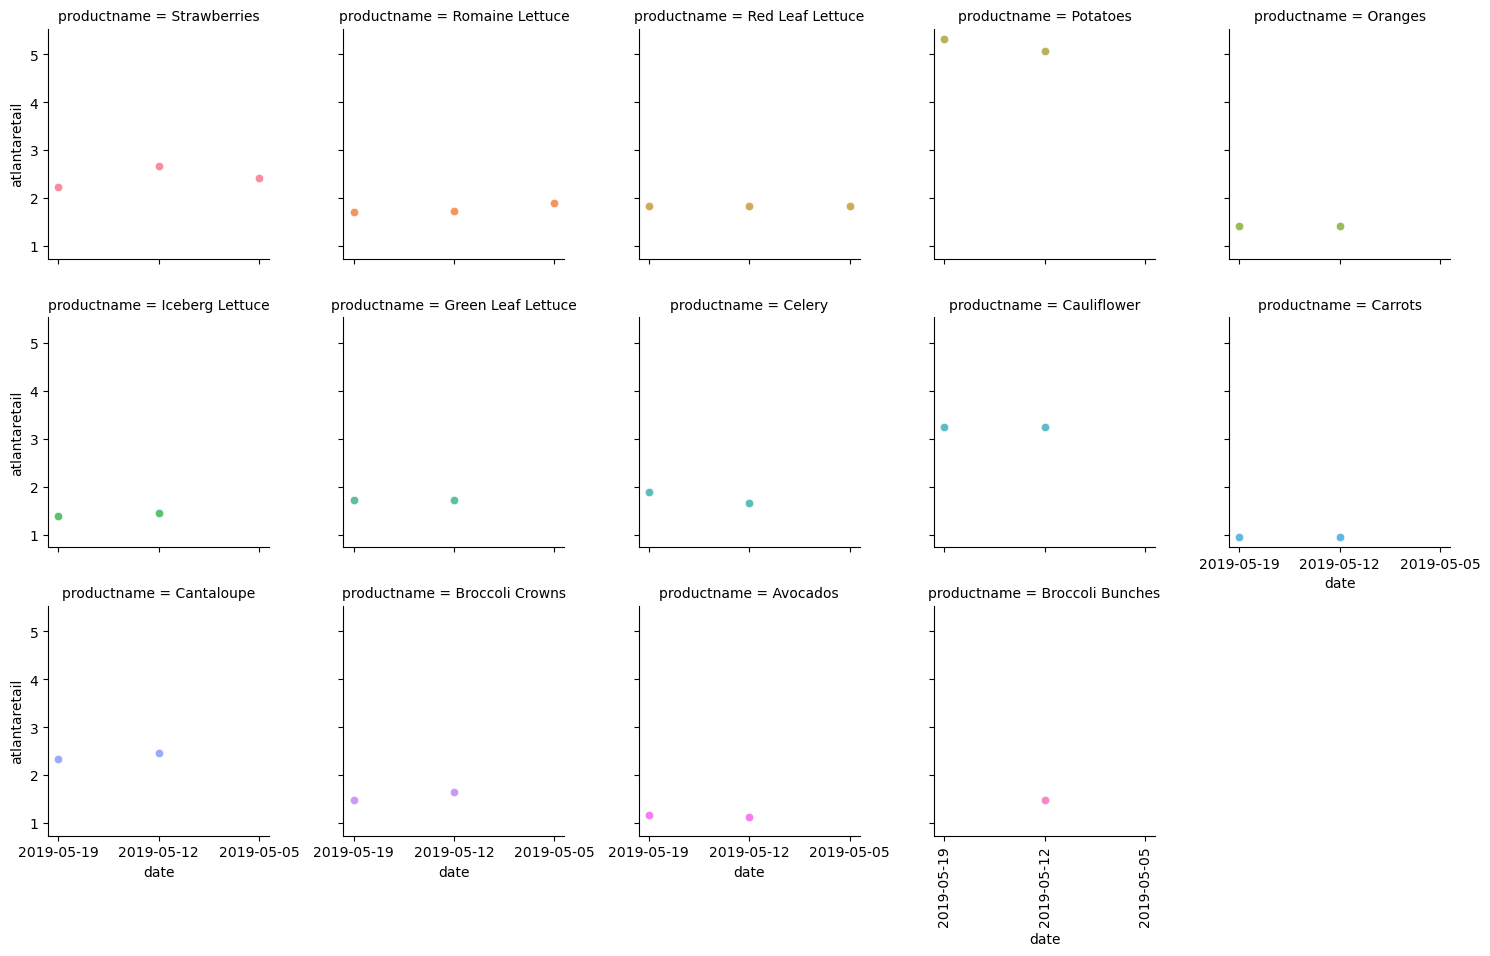

In [193]:
product.remove_random_features('2019-03-01', '2019-05-19') # Видалення випадкових ознак